# Import Packages

In [1]:
# built-in
import os.path

# third-party (pip install required)
import pandas as pd
from pymodulon.core import IcaData
from pymodulon.io import load_json_model
from pymodulon.plotting import *
from pymodulon.util import infer_activities

# Load PRECISE-1K

In [2]:
P1K_PATH = '../../data/precise1k/'

In [3]:
p1k = load_json_model(os.path.join(P1K_PATH, 'precise1k.json.gz'))

# Load K-12 Modulome Data

In [4]:
K12_PATH = '../../data/k12_modulome/'

In [5]:
k12_metadata = pd.read_csv(os.path.join(K12_PATH, 'metadata_qc_part2.csv'), index_col=0)
k12_log_tpm_norm = pd.read_csv(os.path.join(K12_PATH, 'log_tpm_norm.csv'), index_col=0)

# Infer Activities by Project

In [174]:
# hard-coded list of potential DIMAs to make to find good example candidate
dimas_to_do = {
    'aat': [('00m_00s', '02m_00s'), ('00m_00s', '10m_00s')],
    'acid_hns': [('wt', 'del_hns'), ('wt', 'del_hns+hns')],
    'ackA_pta': [('wt', 'del_pta'), ('wt', 'del_ackA')],
    'amp_sub_leth': [('ctrl', 'cipro')],
    'anaero_tf': [('wt', 'del_fnr'), ('wt', 'del_arcA'), ('wt', 'del_IHF')],
    'biofilm_colony': [('liquid_culture', 'colony_24h'), ('liquid_culture', 'colony_72h')],
    'carolacton_tolc': [('ctrl_30m', 'caro_30m')],
    'clpP': [('wt', 'delclpP')],
    'codon_usage': [('wt', 'recoded')],
    'crp_k100': [('wt', 'K100Q'), ('wt', 'K100R')],
    'csr': [('ctrl', 'del_csrBCD'), ('ctrl', 'del_csrA')],
    'csrA': [('wt_t00', 'delcsrA_t00'), ('wt_t10', 'delcsrA_t10')],
    'cyt_supp': [('wt', 'del_cyaA'), ('wt_cyt', 'del_cyaA_cyt')],
    'darobactin': [('solv_30m', 'daro_30m')],
    'elyC': [('wt_37C', 'delelyC_37C'), ('wt_21C', 'delelyC_21C')],
    'evo_acid_w': [('wt', 'F11_2')],
    'evo_bz': [('w3110d13_bz', 'c3_1_bz')],
    'evo_metab': [('wt', 'del_entC'), ('del_entC', 'entC_ale1')],
    'flgM': [('37C', '27C'), ('37C', '42C')],
    'fluoxetine': [('wt', 'chl_res_30d')],
    'fum_ko': [('wt', 'del_fumACB'), ('wt_mms_aKG', 'del_fumACB_mms_aKG')],
    'halicin': [('no_drug_t4', 'halicin_1x_t4')],
    'hns': [('wt', 'del_hns')],
    'hu': [('wt_lag_pH7', 'wt_lag_pH5'), ('wt_lag_pH5', 'delhupAhupB_lag_pH5')],
    'hyperpersistence': [('wt','pth_mut')],
    'isoprenol_ale': [('wt', 'aleA')],
    'lrp': [('wt_min_log', 'dellrp_min_log')],
    'ml_abx': [('ctrl', 'dox')],
    'nap_ko': [('wt', 'del_fis')],
    'nit_yeaG': [('wt_Nminus', 'del_yeaG_Nminus')],
    'phage_lysogen': [('wt_ctrl', 'O157_H7_PA8')],
    'pollution': [('wt_ctrl', 'wt_diesel'), ('wt_diesel', 'evo_diesel'), ('wt_ctrl', 'wt_urban')],
    'ppGpp': [('wt_delrelA_00m', 'wt_delrelA_10m')],
    'pts_del': [('wt', 'del_PTS_mglABC')],
    'pykF_ferment': [('ctrl_12h', 'del_pykF_12h')],
    'rRNA_del': [('wt', 'del_rnhA')],
    'rnr_prp_anaero': [('wt_aero', 'wt_anaero'), ('wt_anaero', 'del_rnr_anaero_prp')],
    'rpoD': [('wt', 'rpoD_mut')],
    'rsd': [('wt_ee', 'del_rpoS_ee')],
    'salt': [('wt', 'nacl_5pct')],
    'starve_series': [('t00_growth1', 't12_starve')],
    't7_time': [('t7_5min', 't7_10min')],
    'time_course': [('lb_4hr', 'lb_72hr')],
    'triclosan': [('wt', 'evo_chl_tcs')]
}

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('00m_00s', '02m_00s')


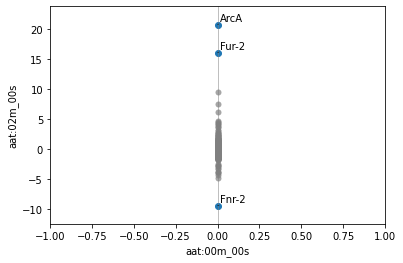

('00m_00s', '10m_00s')


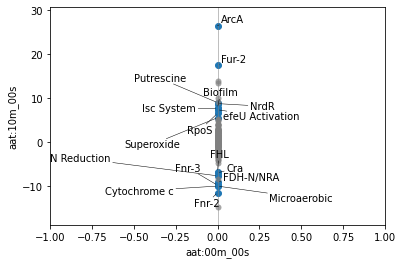

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'del_hns')


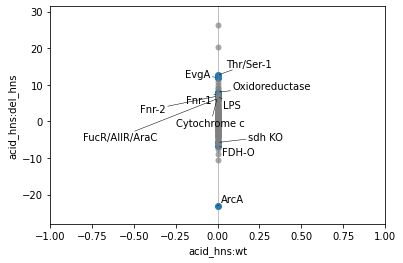

('wt', 'del_hns+hns')


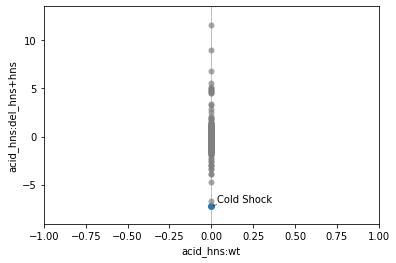

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'del_pta')


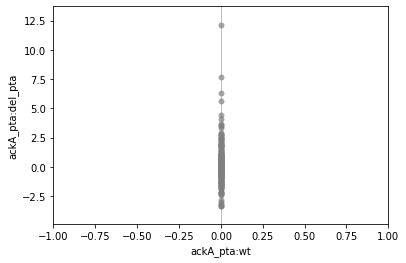

('wt', 'del_ackA')


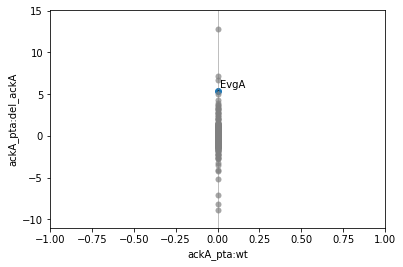

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('ctrl', 'cipro')


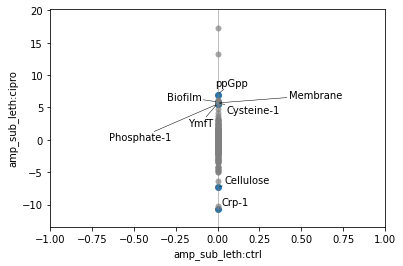

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'del_fnr')


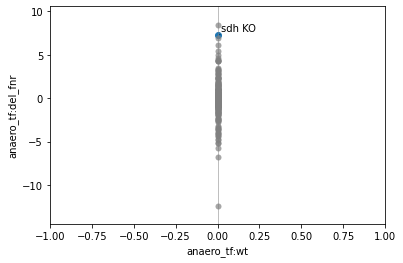

('wt', 'del_arcA')


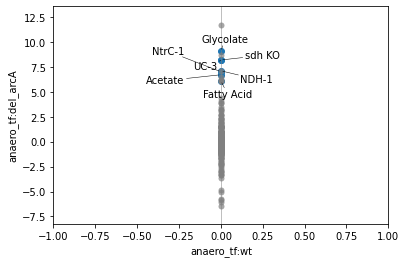

('wt', 'del_IHF')


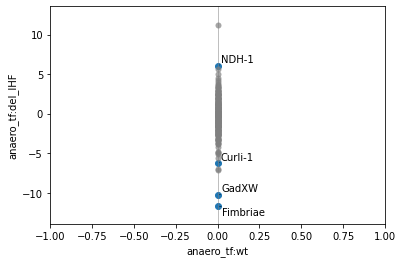

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('liquid_culture', 'colony_24h')


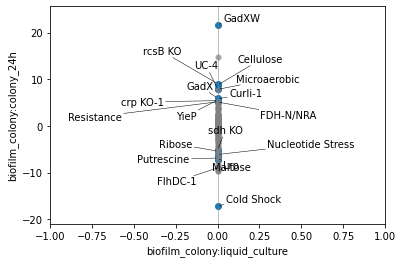

('liquid_culture', 'colony_72h')


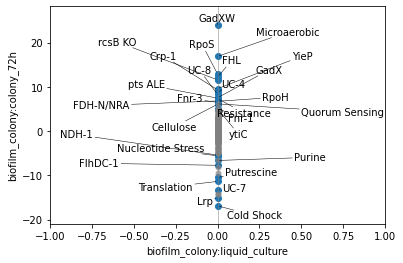

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('ctrl_30m', 'caro_30m')


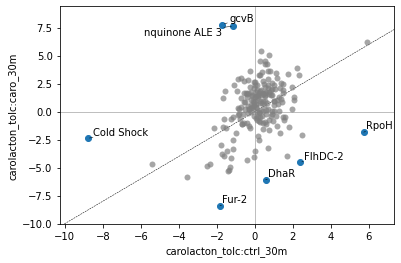

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'delclpP')


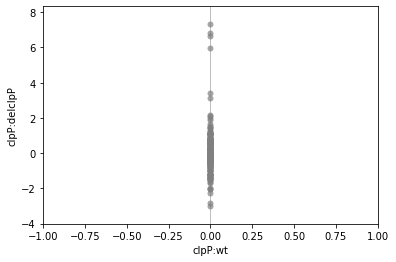

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'recoded')


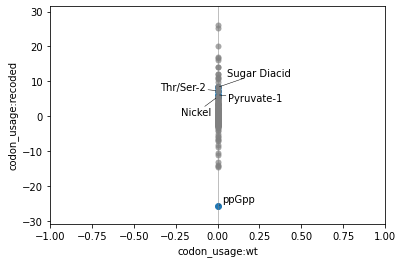

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'K100Q')


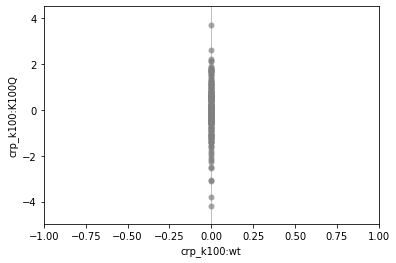

('wt', 'K100R')


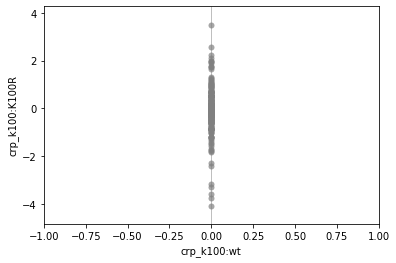

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('ctrl', 'del_csrBCD')


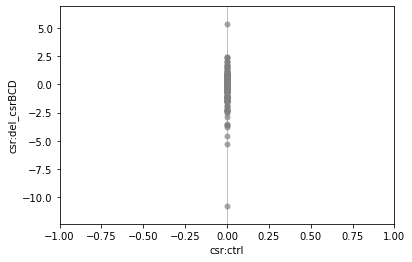

('ctrl', 'del_csrA')


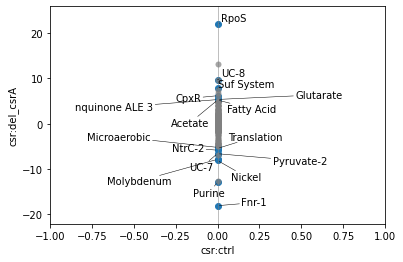

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt_t00', 'delcsrA_t00')


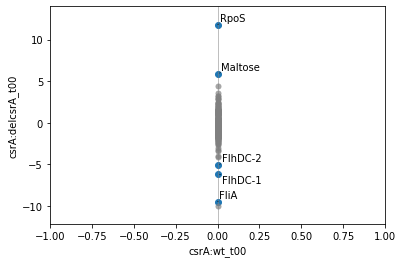

('wt_t10', 'delcsrA_t10')


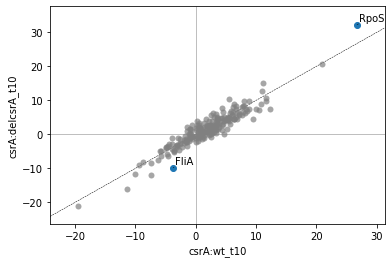

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'del_cyaA')


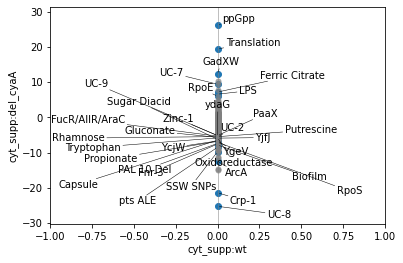

('wt_cyt', 'del_cyaA_cyt')


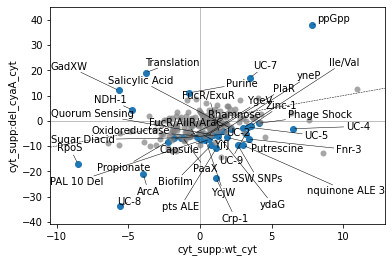

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('solv_30m', 'daro_30m')


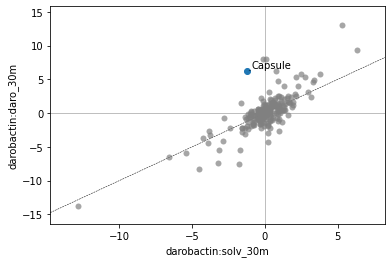

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt_37C', 'delelyC_37C')


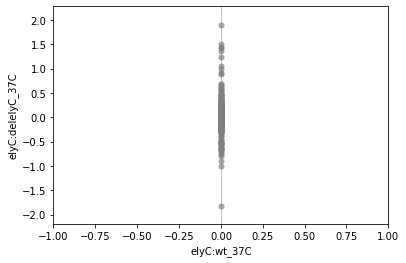

('wt_21C', 'delelyC_21C')


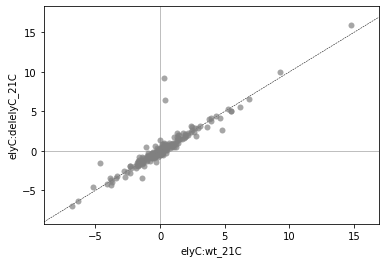

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'F11_2')


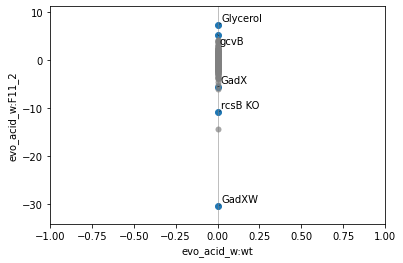

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('w3110d13_bz', 'c3_1_bz')


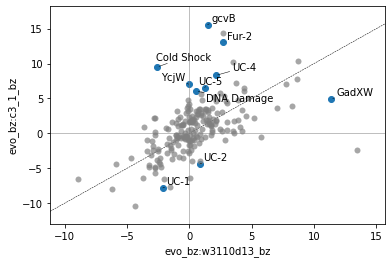

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'del_entC')


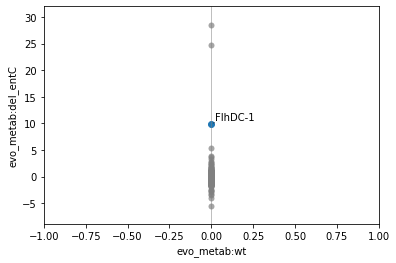

('del_entC', 'entC_ale1')


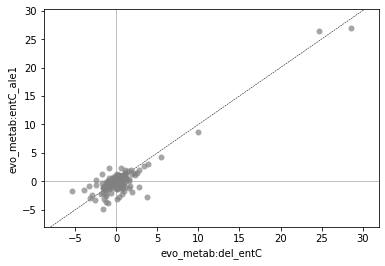

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('37C', '27C')


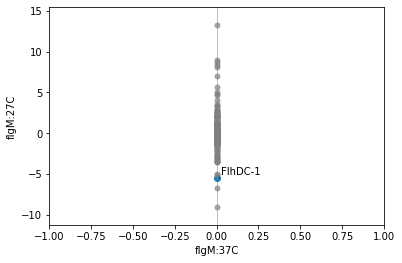

('37C', '42C')


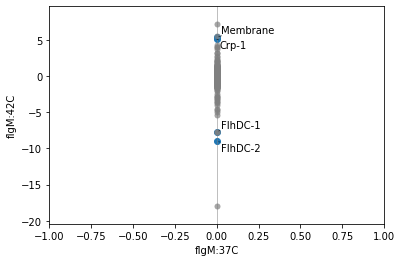

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'chl_res_30d')


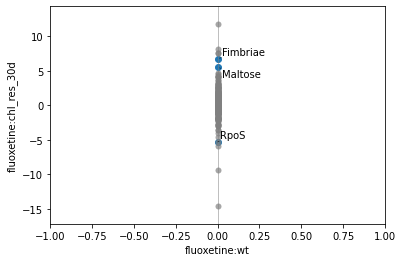

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'del_fumACB')


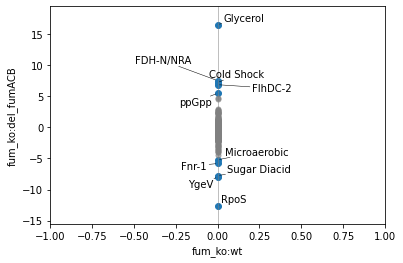

('wt_mms_aKG', 'del_fumACB_mms_aKG')


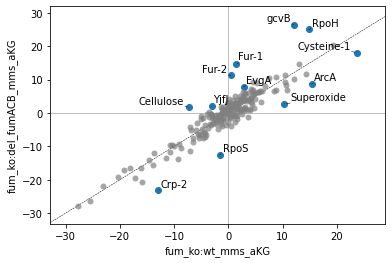

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('no_drug_t4', 'halicin_1x_t4')


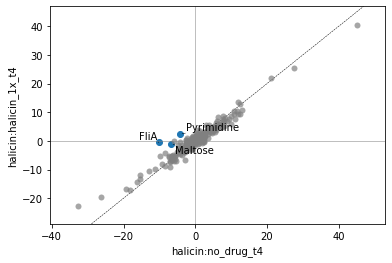

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'del_hns')


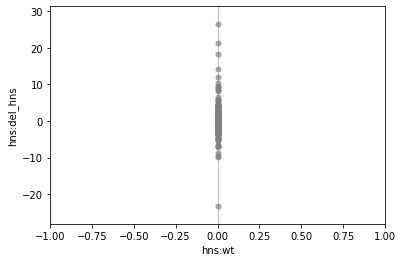

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt_lag_pH7', 'wt_lag_pH5')


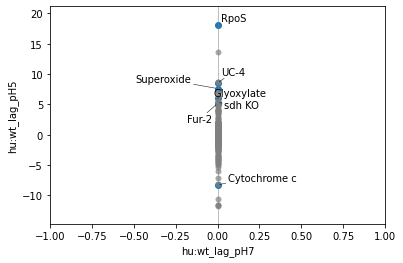

('wt_lag_pH5', 'delhupAhupB_lag_pH5')


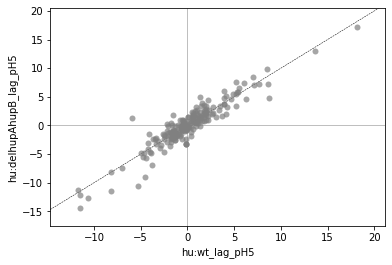

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'pth_mut')


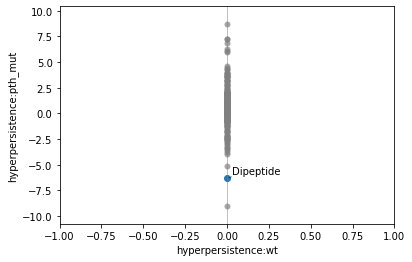

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'aleA')


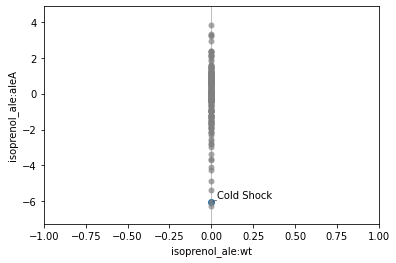

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt_min_log', 'dellrp_min_log')


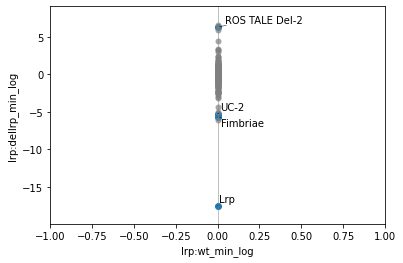

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('ctrl', 'dox')


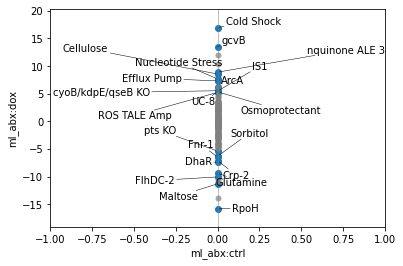

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'del_fis')


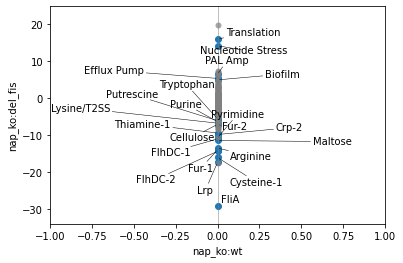

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt_Nminus', 'del_yeaG_Nminus')


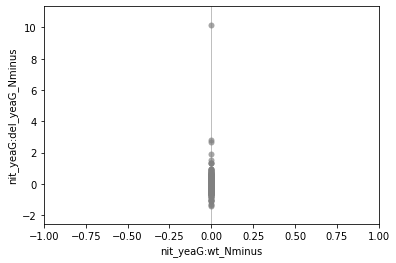

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt_ctrl', 'O157_H7_PA8')


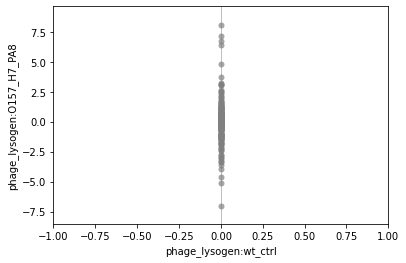

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt_ctrl', 'wt_diesel')


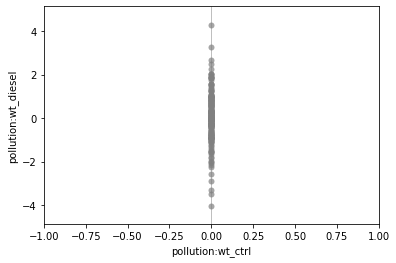

('wt_diesel', 'evo_diesel')


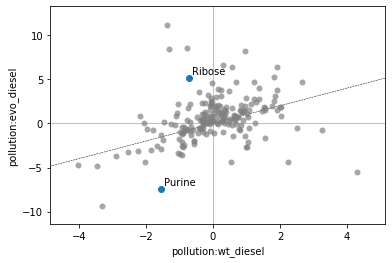

('wt_ctrl', 'wt_urban')


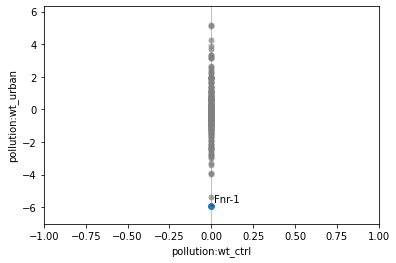

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt_delrelA_00m', 'wt_delrelA_10m')


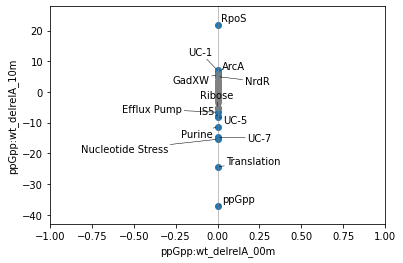

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'del_PTS_mglABC')


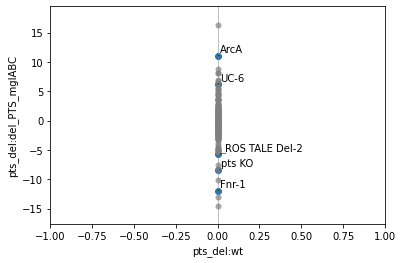

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('ctrl_12h', 'del_pykF_12h')


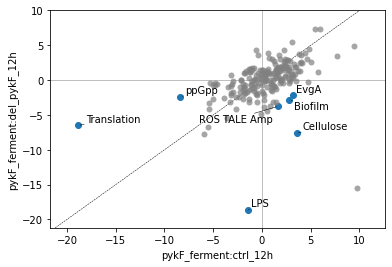

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'del_rnhA')


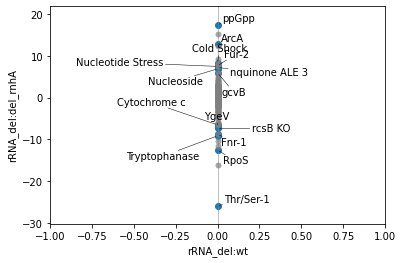

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt_aero', 'wt_anaero')


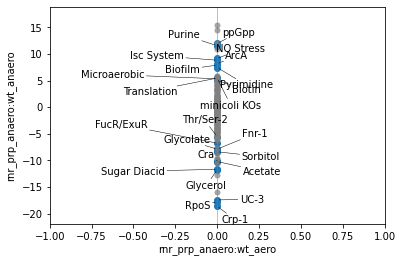

('wt_anaero', 'del_rnr_anaero_prp')


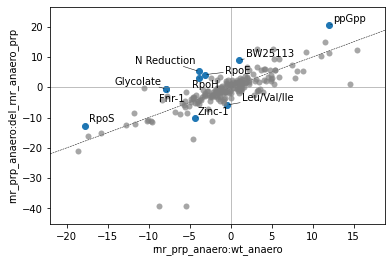

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'rpoD_mut')


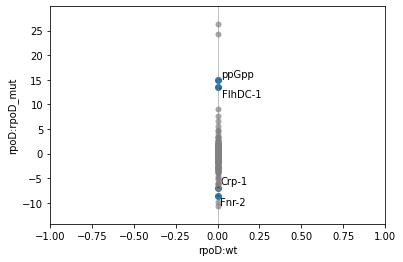

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt_ee', 'del_rpoS_ee')


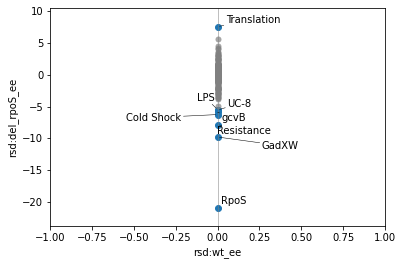

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'nacl_5pct')


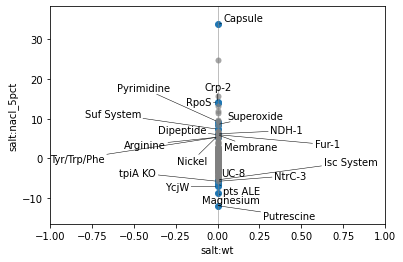

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('t00_growth1', 't12_starve')


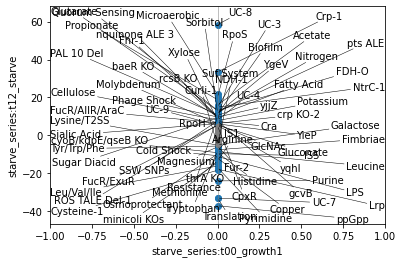

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('t7_5min', 't7_10min')


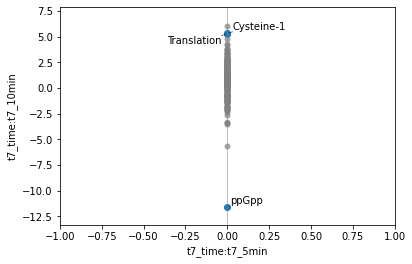

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('lb_4hr', 'lb_72hr')


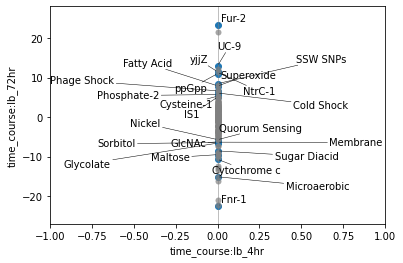

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('wt', 'evo_chl_tcs')


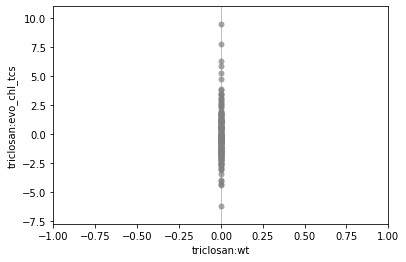

In [173]:
for project, proj_md_df in k12_metadata.groupby('project'):
    if project in dimas_to_do:
        inferred_A = infer_activities(p1k, k12_log_tpm_norm[proj_md_df.index])
        new_data = IcaData(
            p1k.M,
            inferred_A,
            gene_table=p1k.gene_table,
            sample_table=proj_md_df,
            imodulon_table=p1k.imodulon_table
        )
        dimas_for_proj = dimas_to_do[project]
        for dima_for_proj in dimas_for_proj:
            print(dima_for_proj)
            plot_dima(new_data, f'{project}:{dima_for_proj[0]}', f'{project}:{dima_for_proj[1]}')
            plt.show()

In [212]:
further_invest = ['aat', 'anaero_tf', 'biofilm_colony', 'carolacton_tolc', 'csr', 'csrA', 'cyt_supp', 'darobactin',
                 'evo_acid_w', 'fum_ko', 'ml_abx', 'nap_ko', 'ppGpp', 'pykF_ferment', 'rnr_prp_anaero',
                 'salt', 'starve_series', 'time_course']

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index


('lb_4hr', 'lb_72hr')


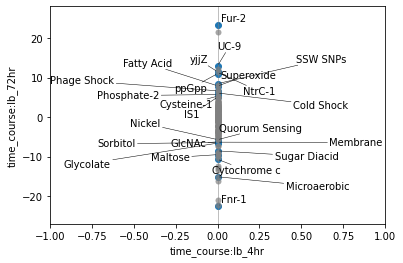

In [215]:
proj = further_invest[17]
proj_md_df = k12_metadata[k12_metadata['project'] == proj]
inferred_A = infer_activities(p1k, k12_log_tpm_norm[proj_md_df.index])
new_data = IcaData(
    p1k.M,
    inferred_A,
    gene_table=p1k.gene_table,
    sample_table=proj_md_df,
    imodulon_table=p1k.imodulon_table
)
dimas_for_proj = dimas_to_do[proj]
for dima_for_proj in dimas_for_proj:
    print(dima_for_proj)
    plot_dima(new_data, f'{proj}:{dima_for_proj[0]}', f'{proj}:{dima_for_proj[1]}')
    plt.show()

In [216]:
ims_for_activity = {
    'aat': ['ArcA', 'Fur-2', 'Fnr-2', 'Fnr-3', 'Isc System', 'Superoxide', 'Cytochrome c', 'Microaerobic', 'N Reduction', 'RpoS'],
    'anaero_tf': ['NtrC-1', 'NDH-1', 'Acetate', 'Fatty Acid', 'Fimbriae', 'GadXW'],
    'biofilm_colony': ['GadXW', 'Cold Shock', 'Quorum Sensing', 'RpoS', 'Microaerobic', 'Cellulose', 'Purine', 'UC-8', 'UC-4'],
    'carolacton_tolc': ['Fur-2', 'DhaR', 'FlhDC-2', 'RpoH', 'Cold Shock', 'gcvB'],
    'csr': ['Fnr-1', 'RpoS', 'Suf System', 'Molybdenum', 'Purine', 'CpxR', 'Nickel', 'Pyruvate-2'],
    'csrA': ['RpoS', 'Maltose', 'FliA', 'FlhDC-1', 'FlhDC-2'],
    'cyt_supp': ['ppGpp', 'Translation', 'RpoS', 'Purine'],
    'darobactin': ['Capsule'],
    'evo_acid_w': ['Glycerol', 'gcvB', 'GadX', 'GadXW'],
    'fum_ko': ['Glycerol', 'FlhDC-2', 'ppGpp', 'Fnr-1', 'Microaerobic', 'RpoS', 'Sugar Diacid', 'gcvB', 'RpoH', 'Superoxide', 'Crp-2', 'Fur-1', 'Fur-2', 'EvgA', 'ArcA'],
    'ml_abx': ['RpoH', 'gcvB', 'Fnr-1', 'Crp-2', 'Cellulose', 'Osmoprotectant', 'Nucleotide Stress'],
    'nap_ko': ['Translation', 'Nucleotide Stress', 'Biofilm', 'FliA', 'Arginine', 'Maltose', 'Thiamine-1', 'Crp-2', 'Fur-2', 'Fur-1', 'Lrp'],
    'ppGpp': ['ppGpp', 'Translation', 'RpoS', 'ArcA', 'UC-1', 'UC-7', 'Nucleotide Stress', 'GadXW'],
    'pykF_ferment': ['Translation', 'LPS', 'Cellulose', 'Biofilm', 'EvgA', 'ppGpp'],
    'rnr_prp_anaero': ['RpoS', 'ppGpp', 'Glycolate', 'Fnr-1', 'Zinc-1', 'BW25113', 'ArcA', 'Crp-1', 'UC-3', 'Sorbitol'],
    'salt': ['Magnesium', 'Putrescine', 'Isc System', 'Capsule', 'Superoxide', 'RpoS', 'Dipeptide'],
    'starve_series': ['Translation', 'ppGpp', 'UC-7', 'LPS', 'Lrp', 'Crp-1', 'UC-8', 'UC-3', 'Cellulose', 'Fur-2', 'CpxR', 'Copper',
                     'GlcNAc', 'Gluconate', 'Purine', 'Leucine', 'Galactose', 'Potassium', 'Sugar Diacid', 'Sialic Acid', 'Leu/Val/Ile', 'Fatty Acid',
                     'Pyrimidine', 'Magnesium', 'Molybdenum'],
    'time_course': ['Fur-2', 'Fnr-1', 'Sugar Diacid', 'Membrane', 'Microaerobic', 'Sorbitol', 'Nickel', 'Glycolate', 'Phosphate-2', 'Cysteine-1', 'Superoxide',
                   'Fatty Acid', 'UC-9', 'GlcNAc']
}

/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index
/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index
/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodulon/util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.
  shared_genes = ica_data.M.index & data.index
/Users/cam/.virtualenvs/ica/lib/python3.10/site-packages/pymodul

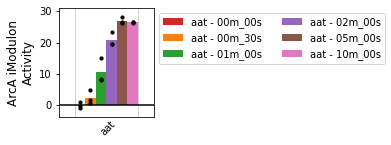

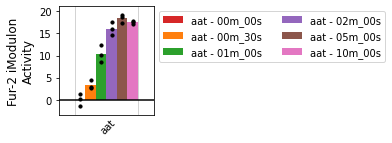

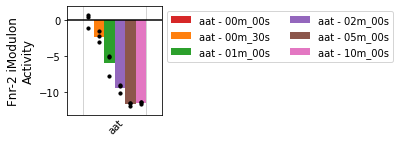

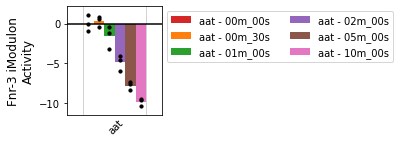

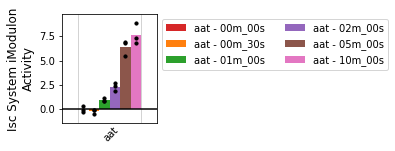

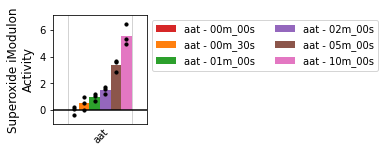

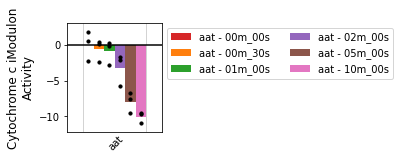

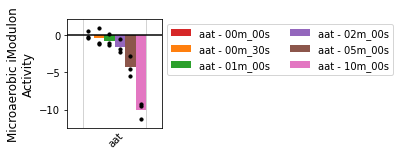

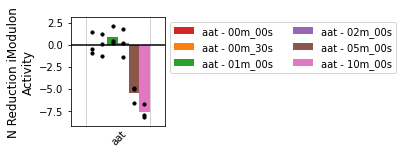

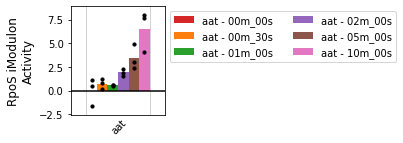

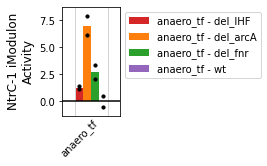

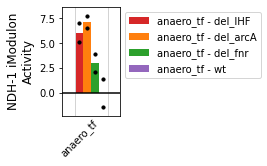

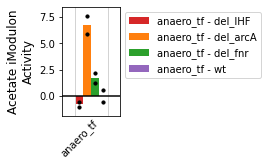

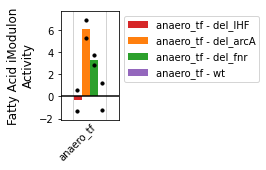

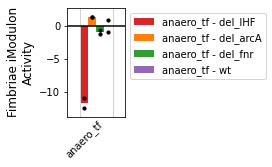

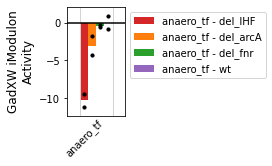

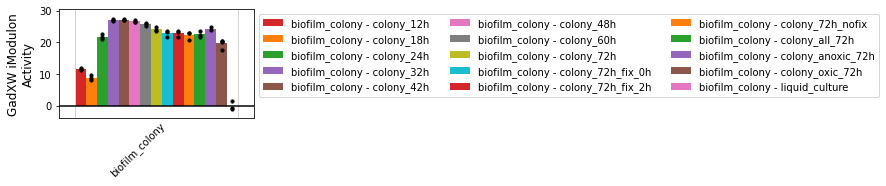

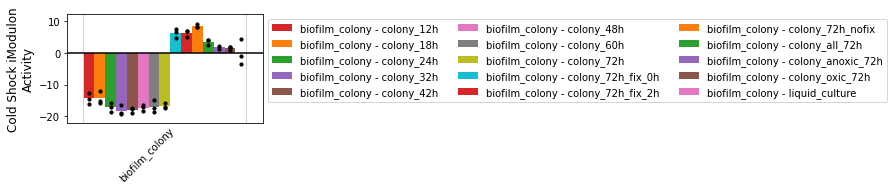

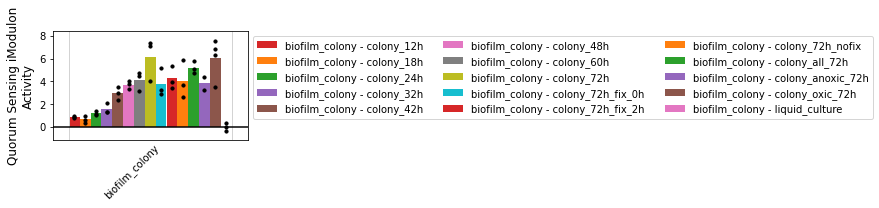

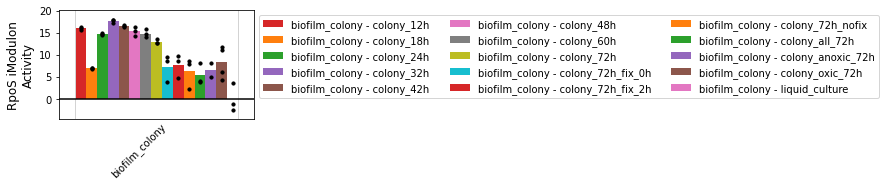

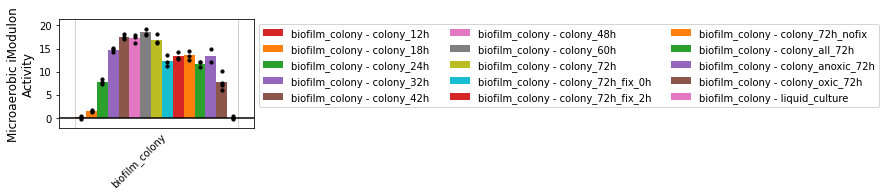

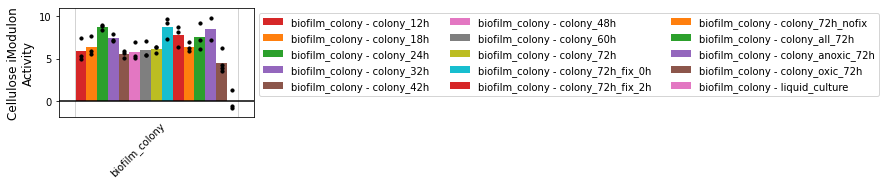

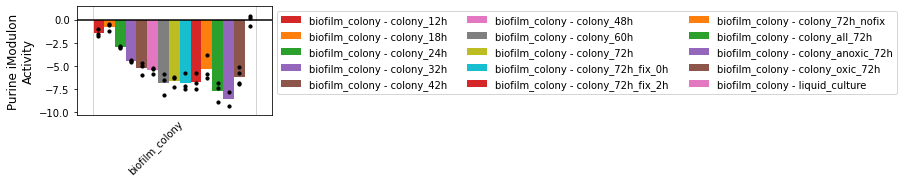

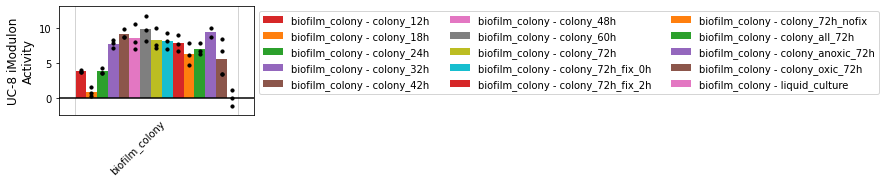

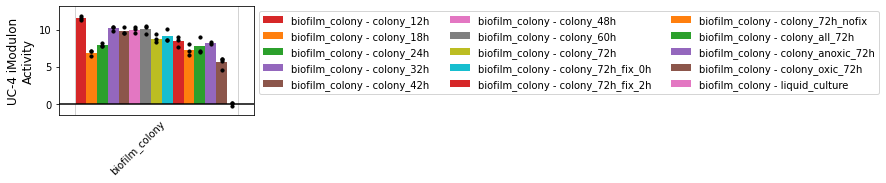

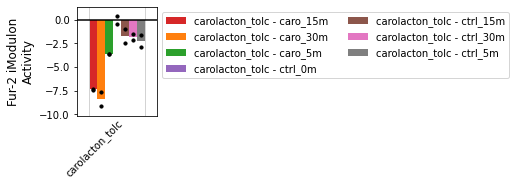

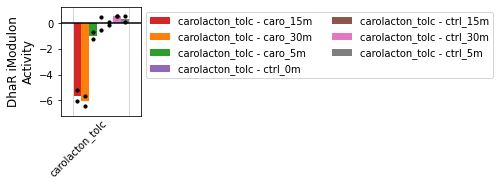

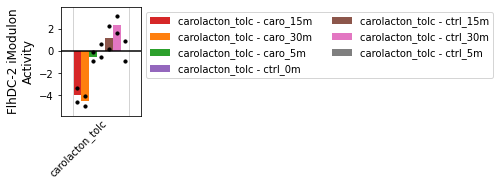

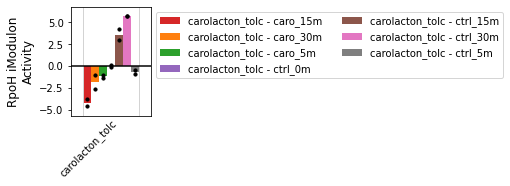

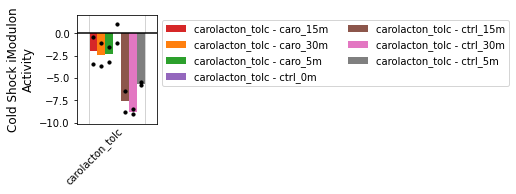

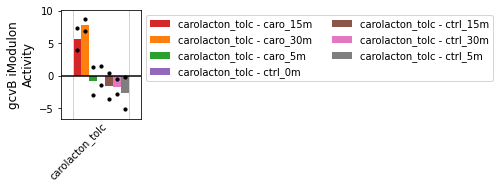

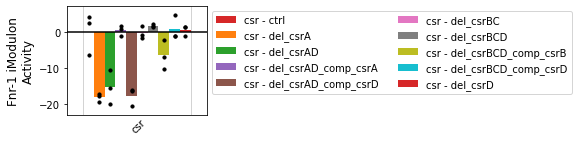

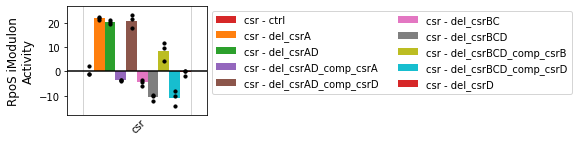

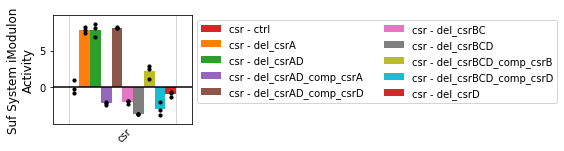

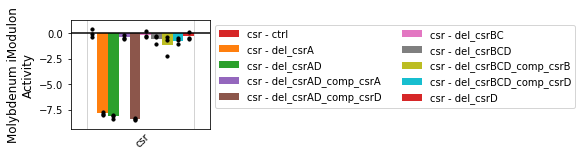

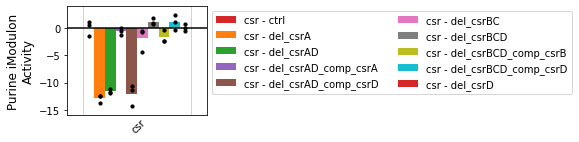

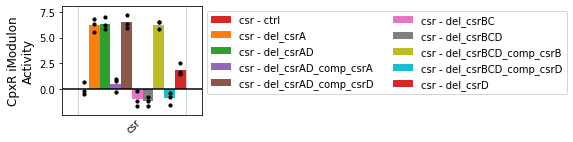

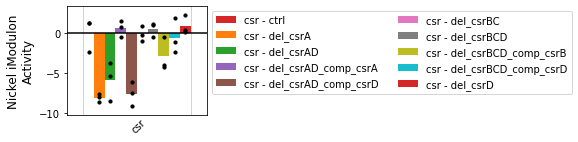

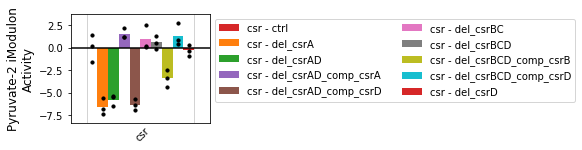

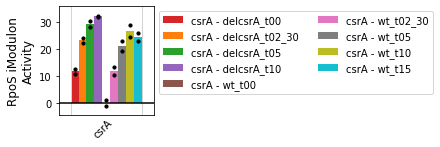

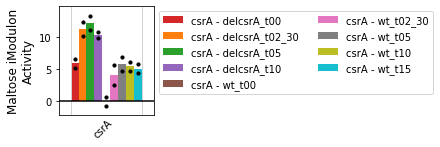

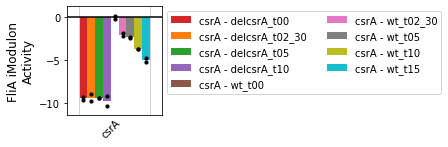

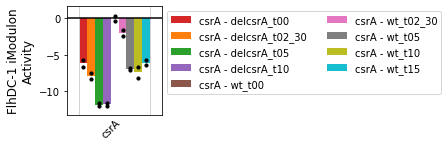

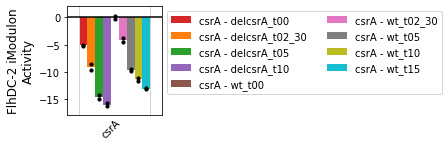

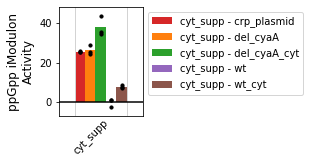

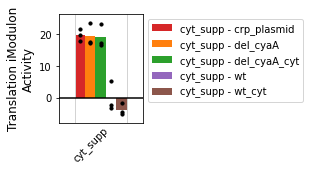

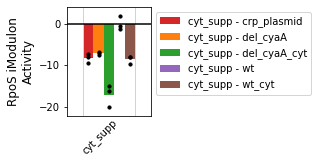

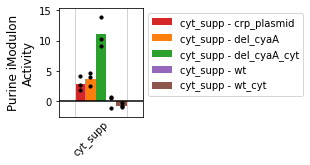

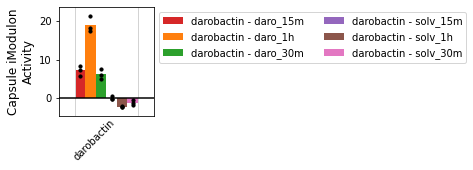

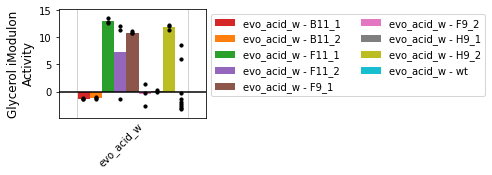

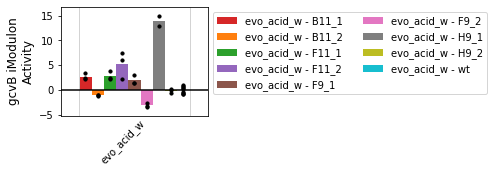

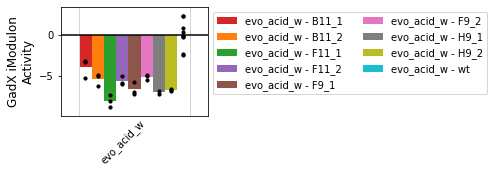

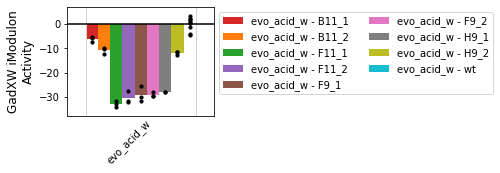

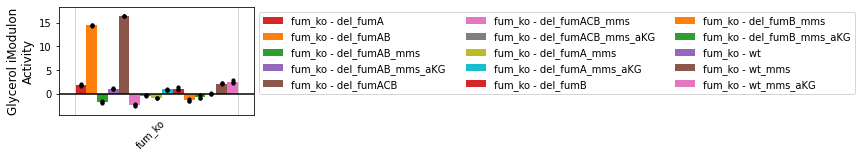

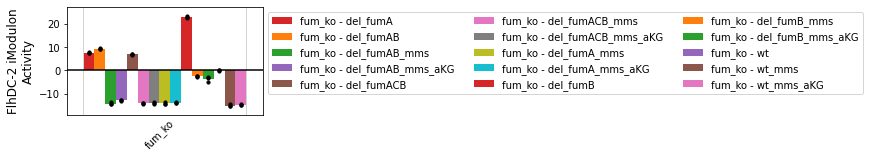

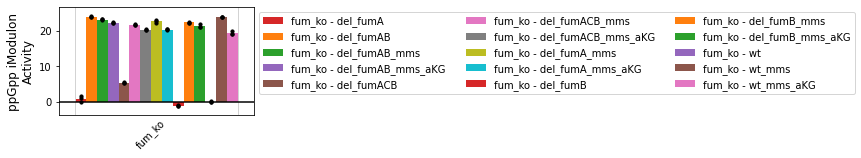

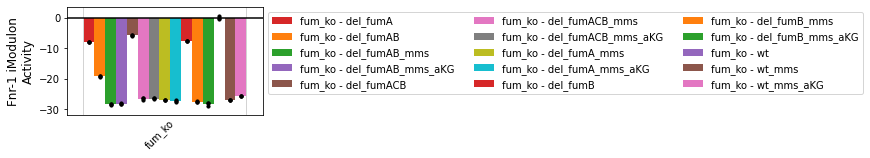

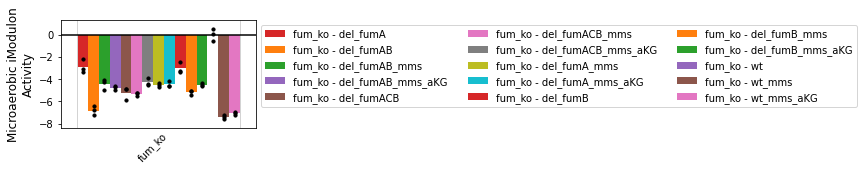

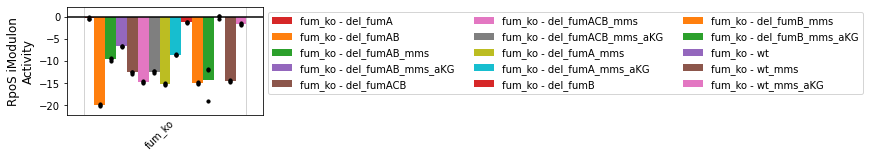

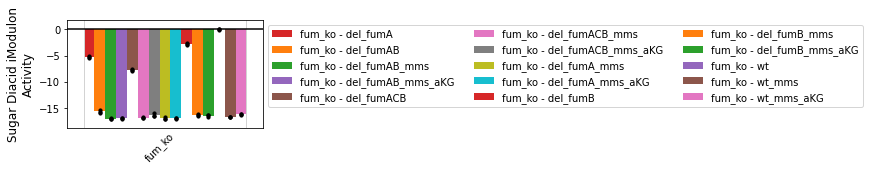

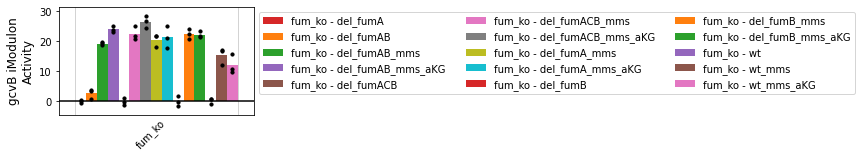

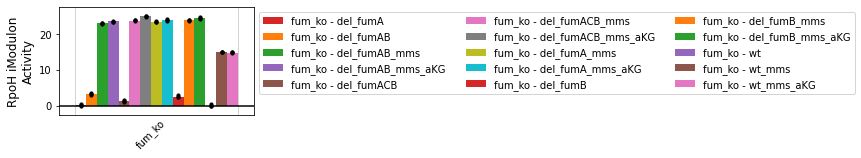

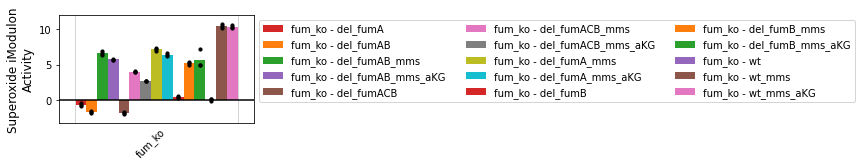

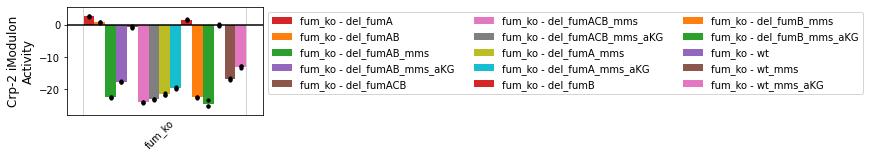

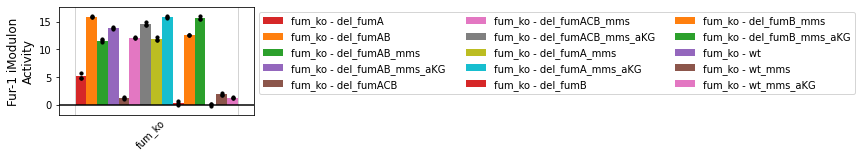

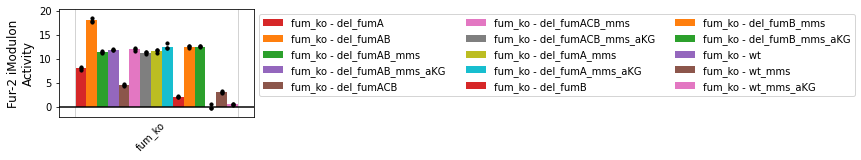

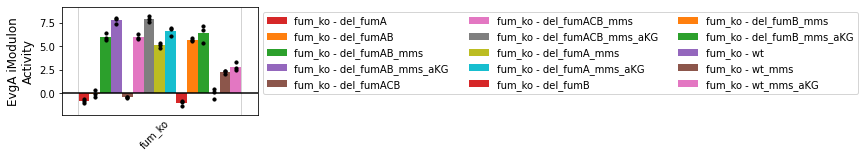

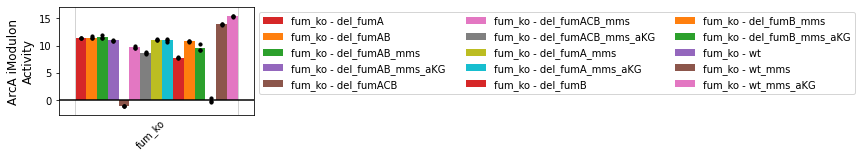

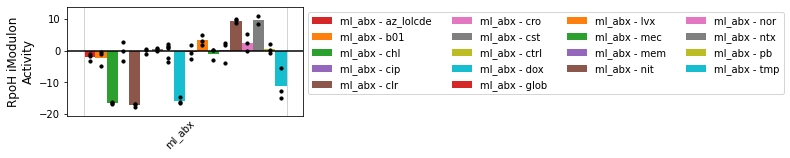

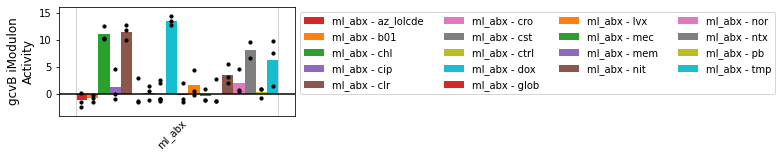

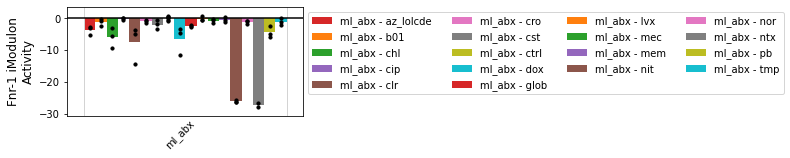

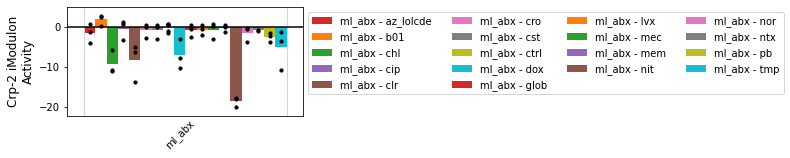

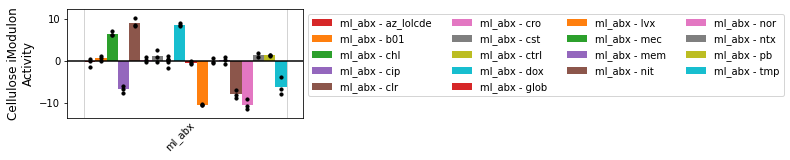

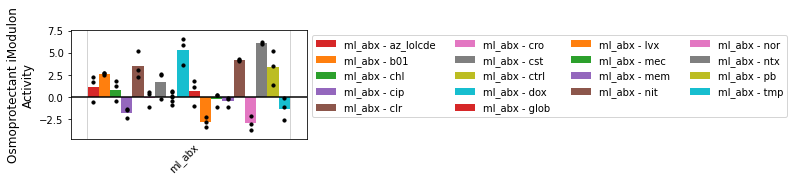

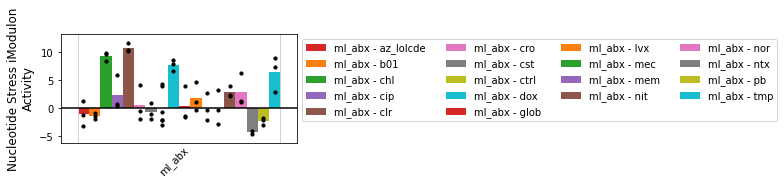

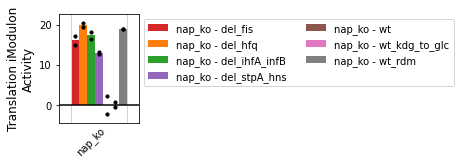

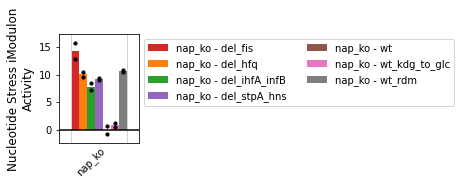

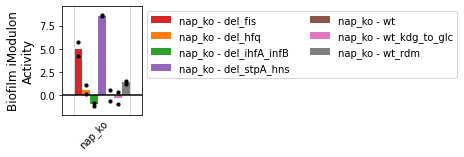

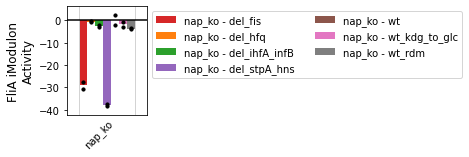

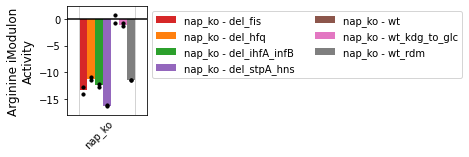

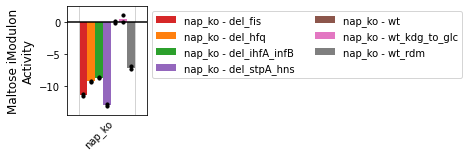

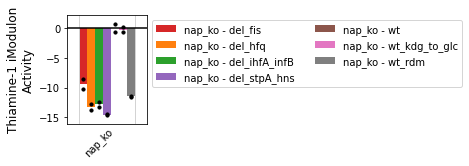

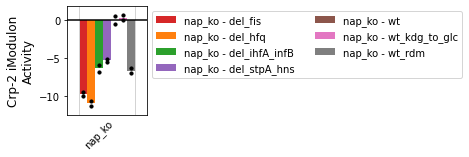

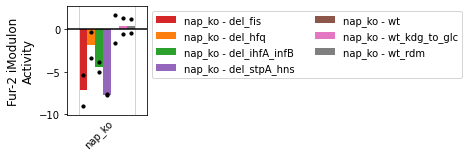

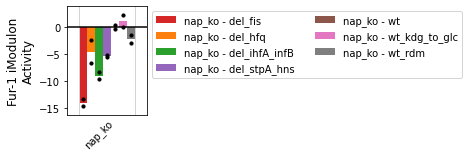

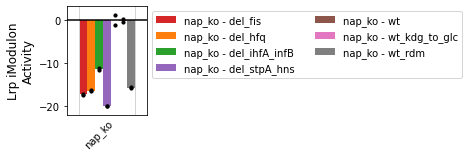

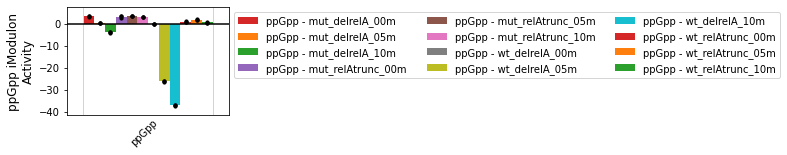

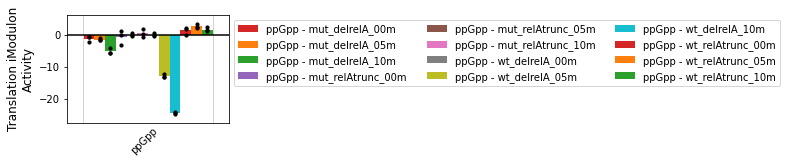

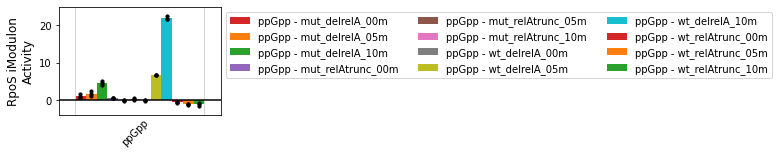

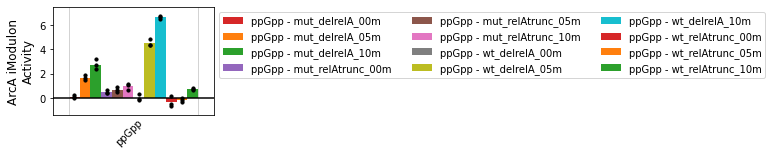

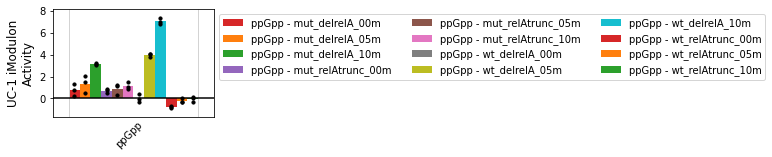

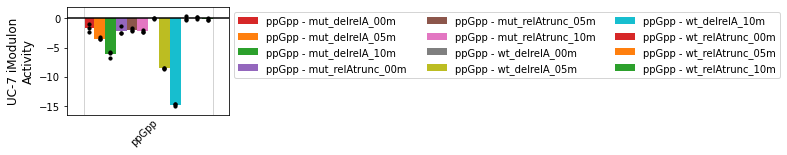

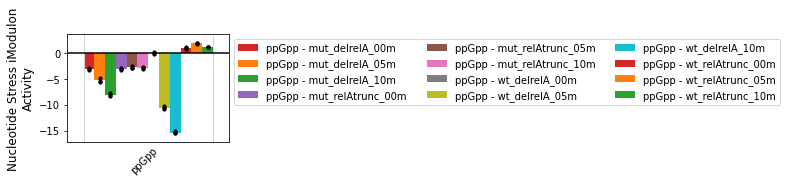

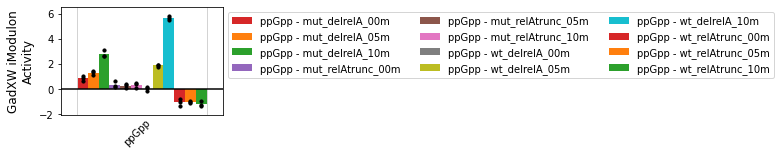

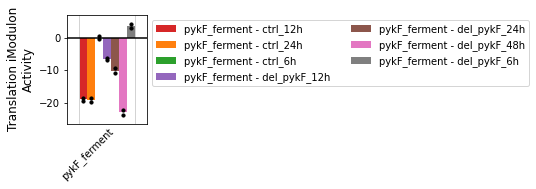

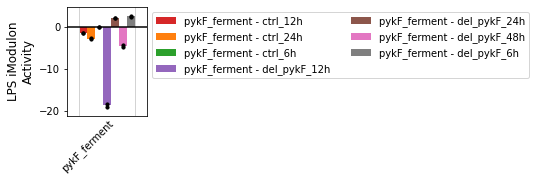

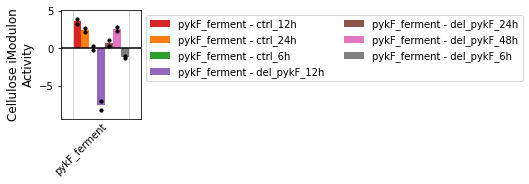

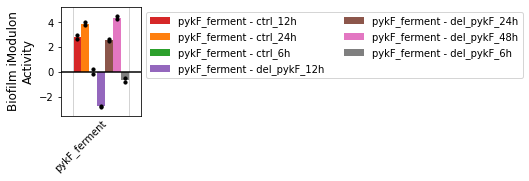

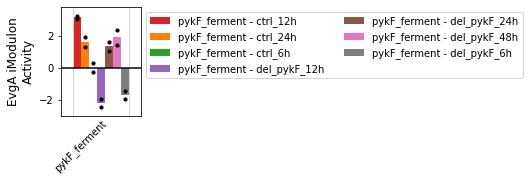

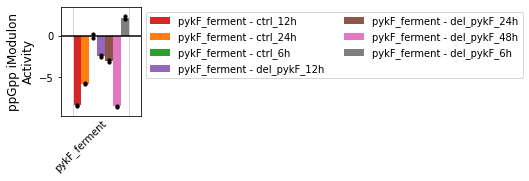

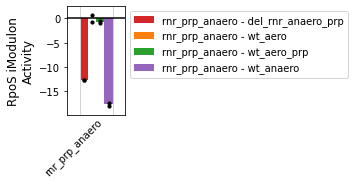

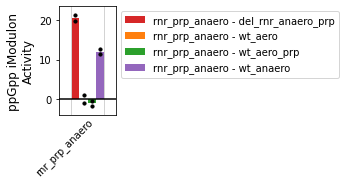

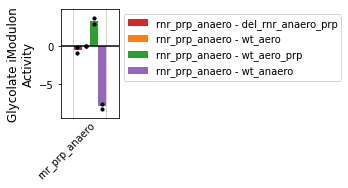

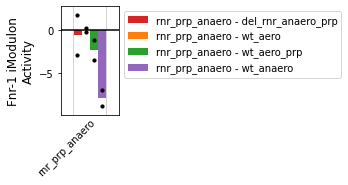

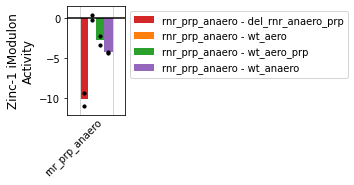

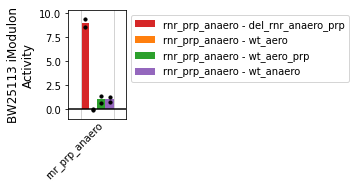

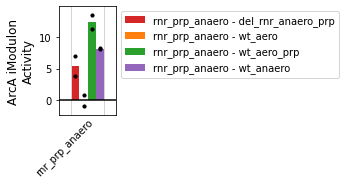

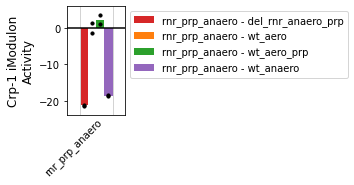

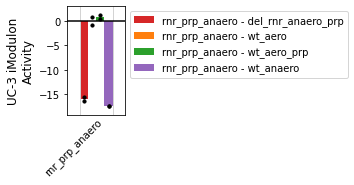

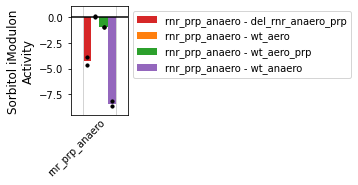

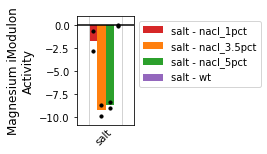

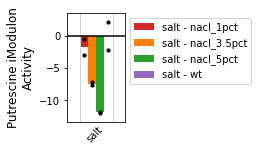

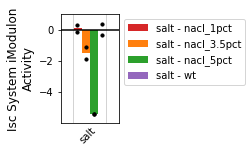

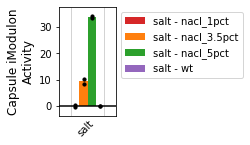

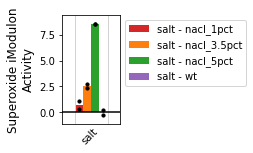

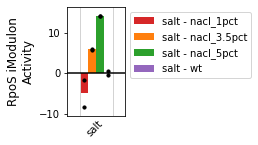

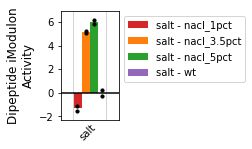

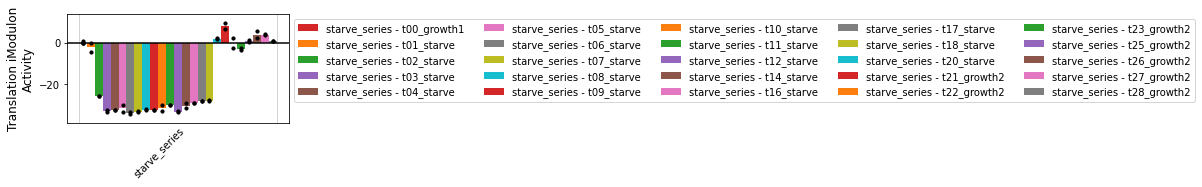

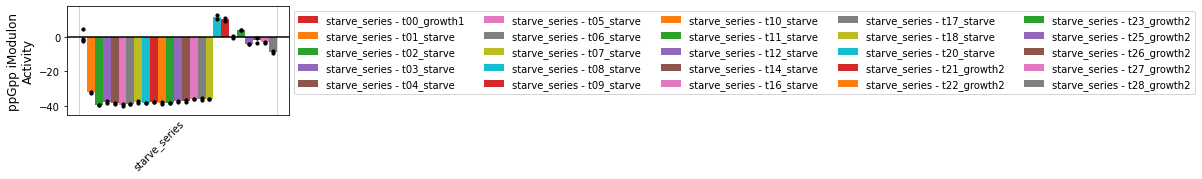

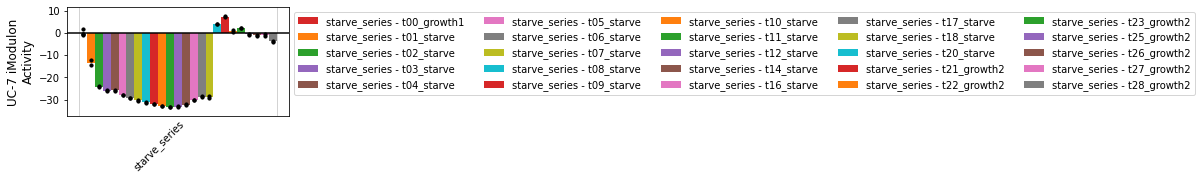

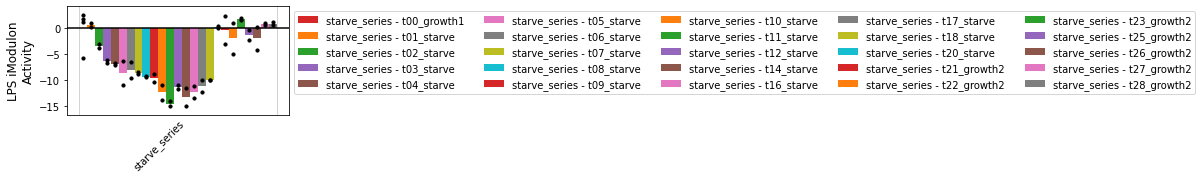

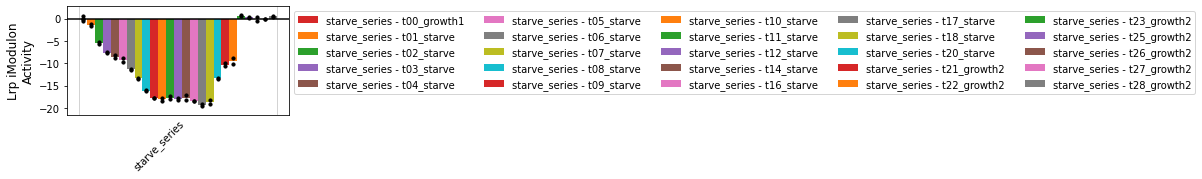

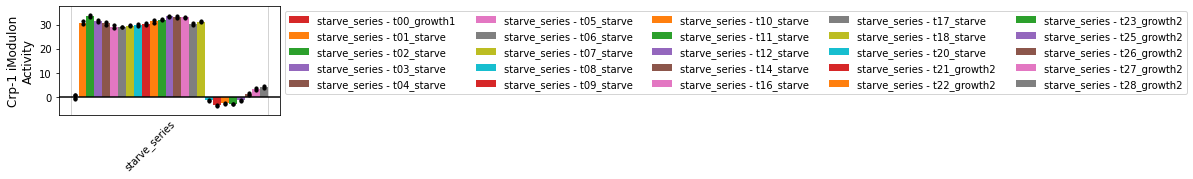

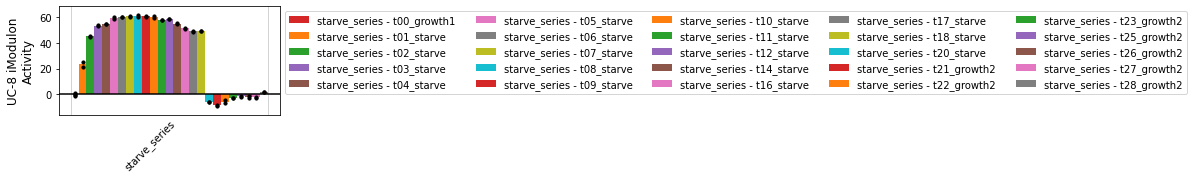

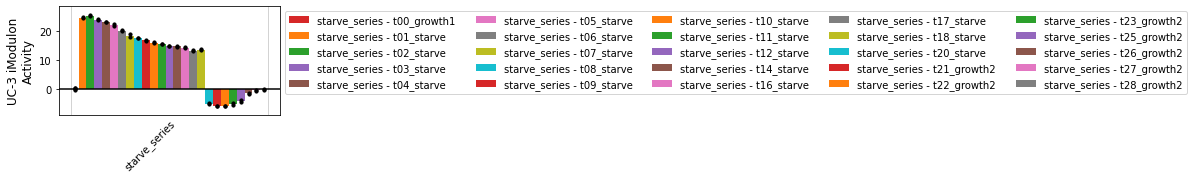

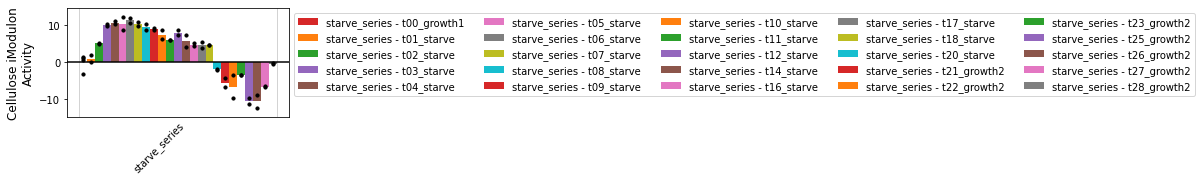

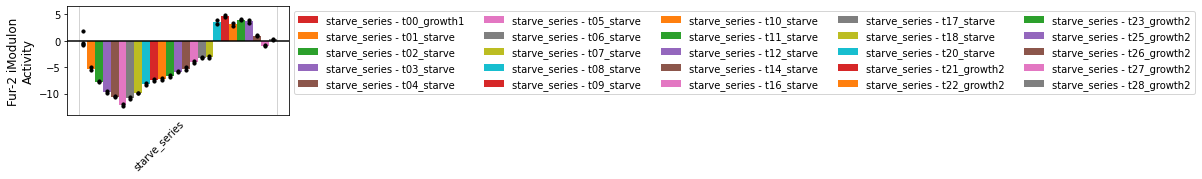

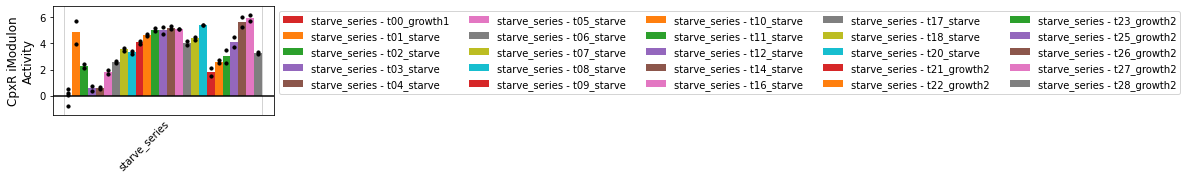

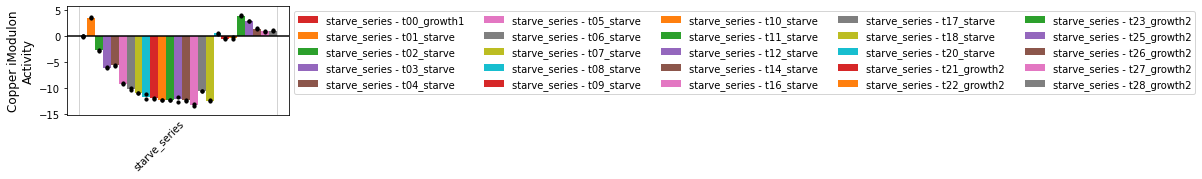

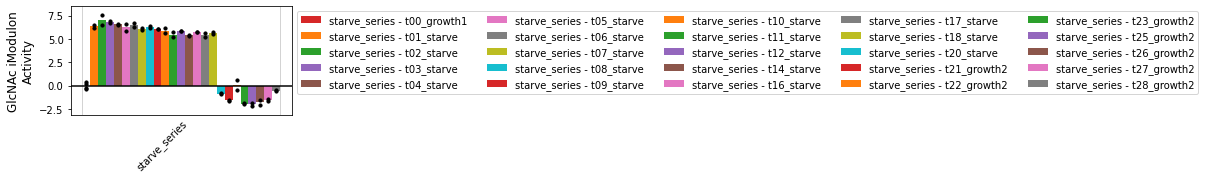

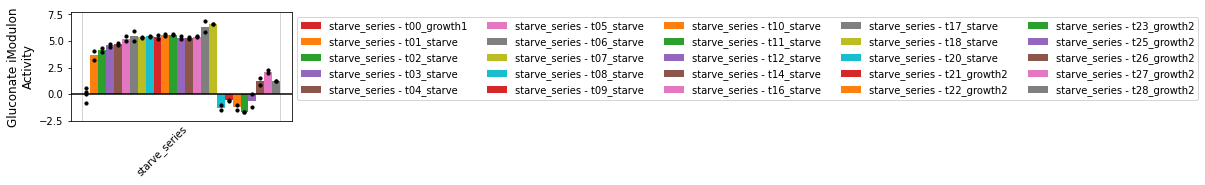

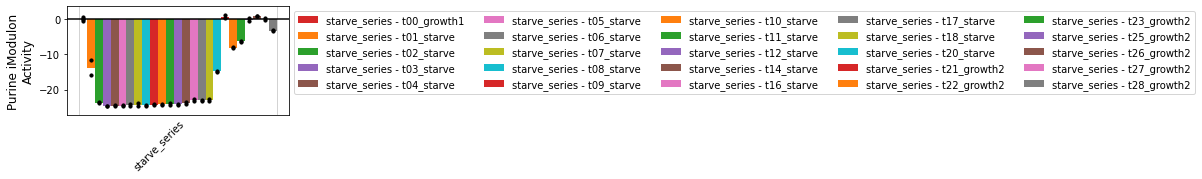

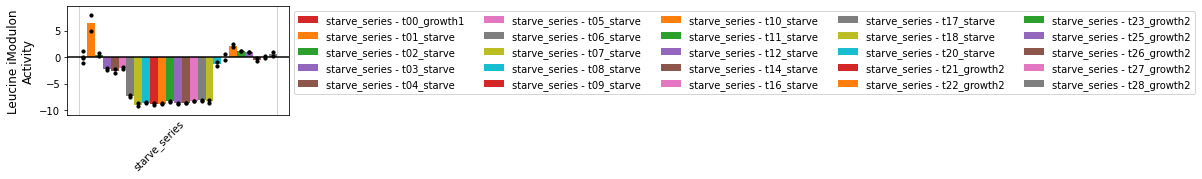

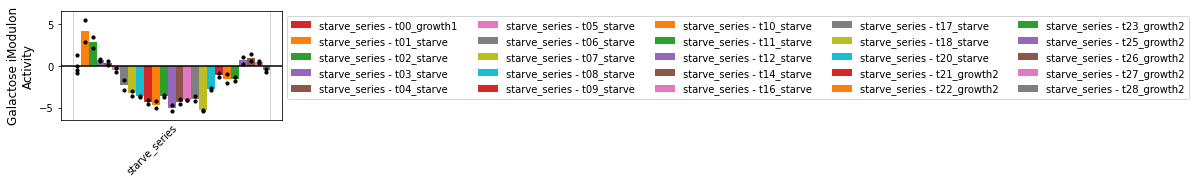

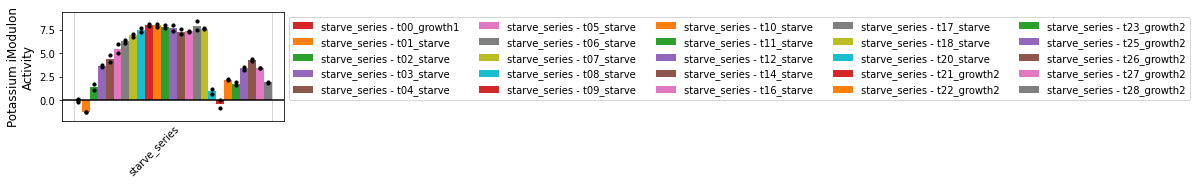

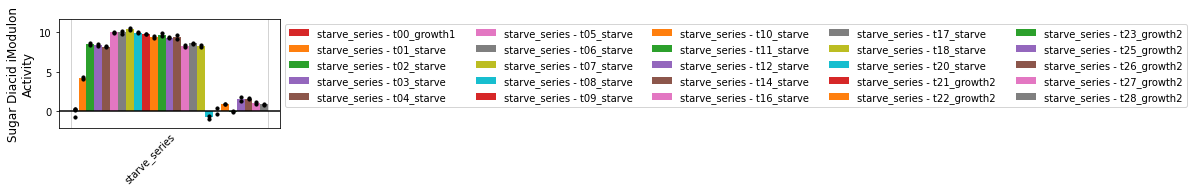

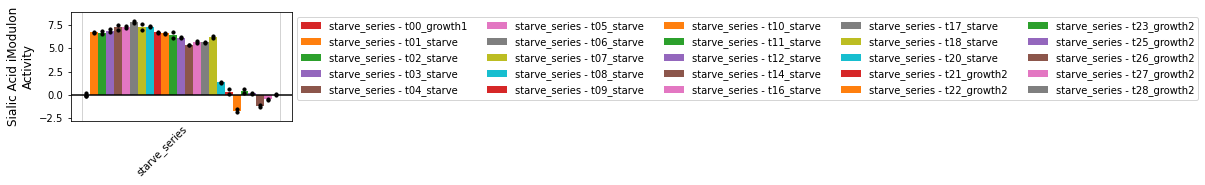

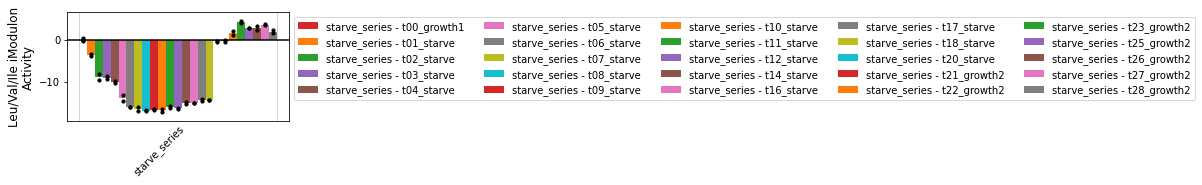

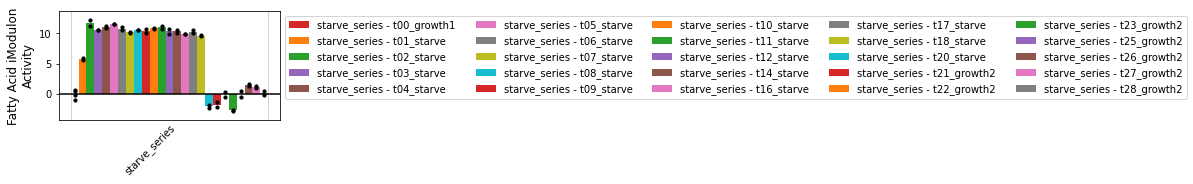

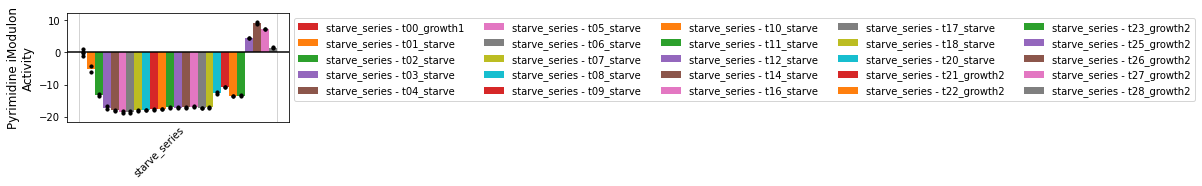

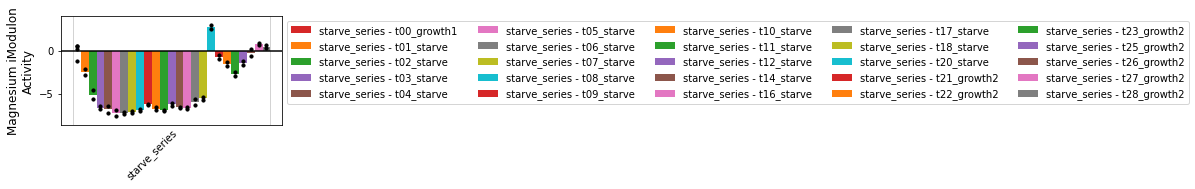

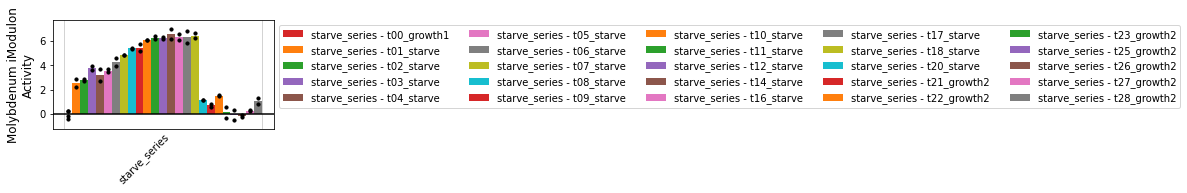

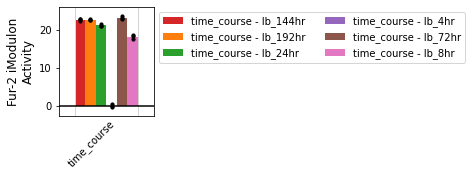

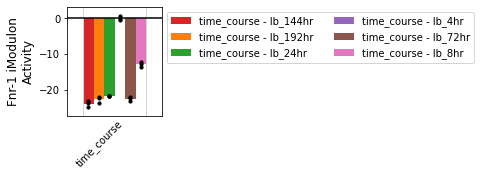

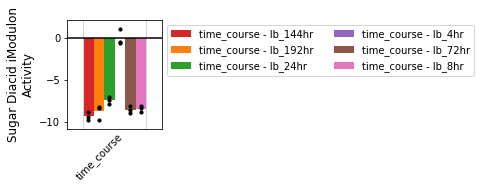

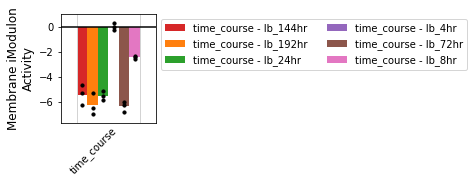

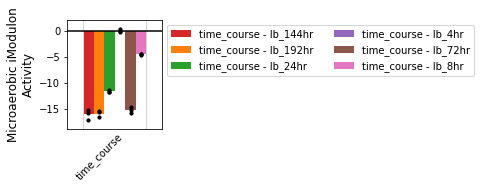

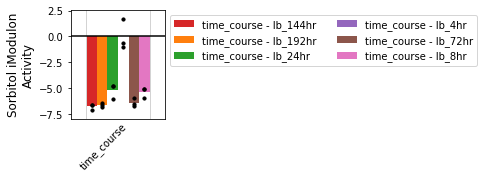

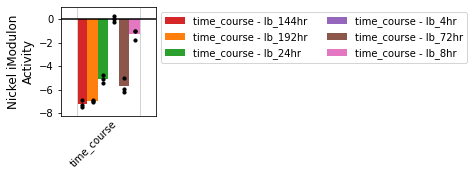

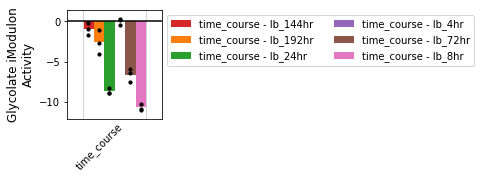

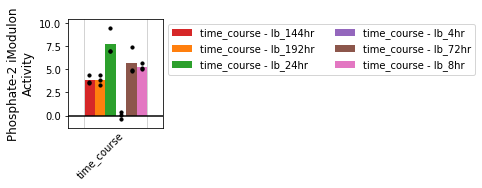

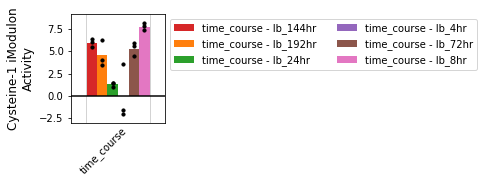

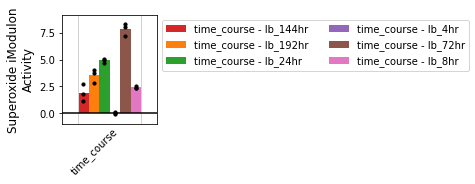

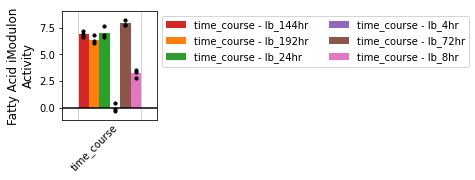

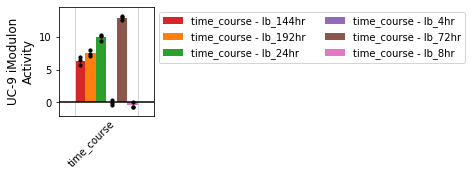

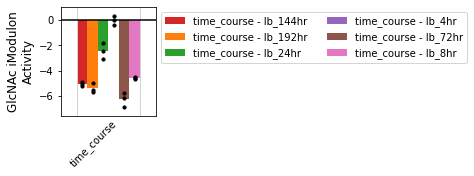

In [218]:
for project, proj_md_df in k12_metadata.groupby('project'):
    if project in ims_for_activity:
        inferred_A = infer_activities(p1k, k12_log_tpm_norm[proj_md_df.index])
        new_data = IcaData(
            p1k.M,
            inferred_A,
            gene_table=p1k.gene_table,
            sample_table=proj_md_df,
            imodulon_table=p1k.imodulon_table
        )
        ims_for_proj = ims_for_activity[project]
        for im in ims_for_proj:
            plot_activities(new_data, im, highlight=project)